load dataset using csv

In [35]:
import csv
import numpy as np
with open("/home/cardosoo/492_19summer/MachineLearning/Data/Level 2 predicting ActorGM, Sample A.csv", 'r') as f:
    data = list(csv.reader(f, delimiter=","))


In [36]:
features = data[0]
#data = list(map(int, data[1:]))
data = np.array(data[1:])

In [37]:
#data.astype(np.float)

However some values in the data were missing so i couldn't convert it to float
So i used pandas to manipulate the data

In [38]:
import pandas as pd
train = pd.read_csv("/home/cardosoo/492_19summer/MachineLearning/Data/Level 2 predicting ActorGM, Sample A.csv")

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Columns: 183 entries, Gender to DiggingActorGM
dtypes: float64(70), int64(100), object(13)
memory usage: 233.1+ KB


looking at column data from FIDSTot to DiggingActorGM. We can see where we have missing elements

In [40]:
train.loc[0:10,'FIDSTot':] == ' '

/home/cardosoo/venv/lib/python3.5/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,FIDSTot,FWITot,FISWTot,FComTot,FNarcissism,FPromotion,FPrevention,FEmoExpression,FLocomotion,FAssessment,...,FIP27,FIP28,FIP29,FIP30,FIP31,FIP32,F4min12,statustot,attracttot,DiggingActorGM
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
train.loc[0:10,'FIDSTot':].get_dtype_counts()

float64    40
int64      99
object     10
dtype: int64

From the code above I suspect the number of missing elements are 10

In [42]:
train.loc[0:10,'FIDSTot':] = train.loc[0:10,'FIDSTot':].replace(' ', 0)

In [43]:
train.loc[0:10,'FIDSTot':].get_dtype_counts()

float64    40
int64      99
object     10
dtype: int64

It didn't change so my guess was wrong.
However in the code below all the values change to False. Which is what i wanted

In [44]:
train.loc[0:10,'FIDSTot':] == ' '

/home/cardosoo/venv/lib/python3.5/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,FIDSTot,FWITot,FISWTot,FComTot,FNarcissism,FPromotion,FPrevention,FEmoExpression,FLocomotion,FAssessment,...,FIP27,FIP28,FIP29,FIP30,FIP31,FIP32,F4min12,statustot,attracttot,DiggingActorGM
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now i apply that to all the elements in the dataset

In [45]:
X = train.loc[:,"Gender":"attracttot"].replace(' ', 0)
y = train["DiggingActorGM"]

Sanity checking y is Gucci (no missing elements)

In [46]:
y == ' '

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
150    False
151    False
152    False
153    False
154    False
155    False
156    False
157    False
158    False
159    False
160    False
161    False
162    False
Name: DiggingActorGM, Length: 163, dtype: bool

Convert pandas dataframe to numpy arrays

In [47]:
X = X.values
y = y.values
X

array([[1, 3.5, '3.75', ..., 5, 2.666666667, 5.0],
       [1, 5.25, '5', ..., 6, 4.666666667, 2.666666667],
       [1, 3.25, '4', ..., 6, 3.666666667, 2.333333333],
       ...,
       [1, 3.25, '4', ..., 9, 5.0, 3.666666667],
       [0, 2.75, '3.5', ..., 8, 5.333333333, 3.0],
       [1, 6.5, '2.75', ..., 9, 4.0, 4.333333333]], dtype=object)

Convert dtype to float

In [48]:
X = X.astype('float')
y = y.astype('float')
X

array([[1.        , 3.5       , 3.75      , ..., 5.        , 2.66666667,
        5.        ],
       [1.        , 5.25      , 5.        , ..., 6.        , 4.66666667,
        2.66666667],
       [1.        , 3.25      , 4.        , ..., 6.        , 3.66666667,
        2.33333333],
       ...,
       [1.        , 3.25      , 4.        , ..., 9.        , 5.        ,
        3.66666667],
       [0.        , 2.75      , 3.5       , ..., 8.        , 5.33333333,
        3.        ],
       [1.        , 6.5       , 2.75      , ..., 9.        , 4.        ,
        4.33333333]])

It worked!!!
Now i will begin picking the best predictors

In [49]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=40).fit(X,y)
indices = selector.get_support(indices=True)
indices

array([  1,   2,   8,  14,  16,  19,  20,  28,  29,  31,  32,  33,  61,
        68,  70,  71,  72,  76,  77,  79,  87,  91,  92,  94,  95,  96,
       100, 110, 113, 114, 118, 123, 125, 132, 135, 139, 140, 144, 159,
       178])

Just for curiousity, i will use a simple model

In [50]:
from keras import layers
from keras import models
def build_model(units,layerz,metric,shape):
    model = models.Sequential()
    model.add(layers.Dense(units, activation = 'relu', 
                           input_shape = (shape,)))
    for layer in range(layerz):
        model.add(layers.Dense(units, activation = 'relu'))
    model.add(layers.Dense(1)) #linear layer
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics =[metric] )
    return model

Using K-fold cross validation

calculate average of the per - epoch MAE scores for all folds

In [80]:
num_epochs = 500
all_scores = []
all_losses = []
all_mae_histories = []
units, layerz, metric = 24,2,'mae'
for i in range(k):
    print('processing fold #', i)
    start = i*num_val_samples
    stop = (i + 1) * num_val_samples
    val_data = train_data[start:stop]
    val_target = train_targets[start:stop]
    
    partial_train_data = np.concatenate( (train_data[:start], train_data[stop:]) ,axis = 0)
    partial_train_target = np.concatenate( (train_targets[:start],train_targets[stop:]), axis = 0) 
    
    model = build_model(units, layerz, metric,shape)
    history = model.fit(partial_train_data, partial_train_target, epochs = num_epochs, batch_size = 1, verbose = 0,
                        validation_data = (val_data, val_target) )

    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [69]:
np.array(all_mae_histories)[:,99] # validations scores for each fold

In [81]:
average_mae_histories = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
len(average_mae_histories)

500

Without smoothing

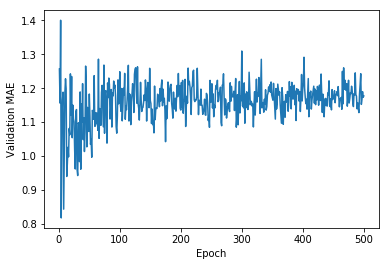

In [82]:
import matplotlib.pyplot as plt
epoch = range(1,len(average_mae_histories)+1) 
plt.plot(epoch,average_mae_histories)
plt.xlabel("Epoch")
plt.ylabel("Validation MAE")
plt.show()



With smoothing

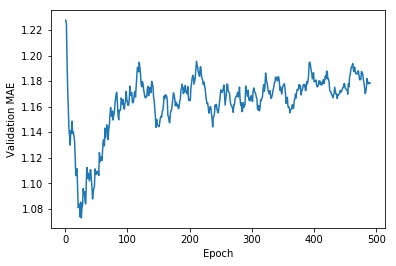

In [83]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point*(1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_histories[10:])

plt.plot(range(1, len(smooth_mae_history) +1), smooth_mae_history)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.show()

Interesting around 15 to 20 epochs we have a good generalization.

let's try to evaluate on sample B

In [ ]:
test = pd.read_csv("/home/cardosoo/492_19summer/MachineLearning/Data/Level 2 predicting ActorGM, Sample B.csv")
X = test.loc[:,"Gender":"attracttot"].replace(' ', 0) # replacing missing values
y = test["DiggingActorGM"]

I got an error

Sample A and B have different names for predictors that's really annoying and makes the whole process messy.

lucky for us she has a training and testing set for actor variance. So we can work with that